# Machine Learing Project (3EC)
## Housing prices in Ames, Iowa
#### Based on the Kaggle challenge: "House Prices - Advanced Regression Techniques" 

#### Student1 name:      Onur Dilsiz     Student ID number: s3138569   Date:  xxxxxxxxxxxxx

#### Student2 name:      Atis Kazaferi     Student ID number: s2074281 

# Brief Report

## Missing Data
We differentiate between various types of missing data. Firstly, we calculate the percentage of missing data, where PoolQCm, MiscFeature, Alley and Fence have more than 80% missing values. Hence, we decide to delete these inputs. Secondly, we choose to keep features with less than 50% missing values. Now we thoroughly differentiate among the different categorical columns with missing values:
- For FireplaceQu and GarageType, GarageFinish, GarageQual, GarageCond
    Substitude missing values with category "None"
- For LotFrontage
    Group the data per neighbourhood and transform via the lambda function. This is done for each group of lotFrontage within each neighbourhood. We impute LotFrontage with the median of the values in the neighbourhood
- For GrageYrBlt, GarageArea, GarageCars, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF,TotalBsmtSF, BsmtFullBath, BsmtHalfBath, MasVnrArea
    All missing data is equal to value 0, as this indicates there is no data available.
- For BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, MasVnrType, MSsubClass
    All missing data us equal to None, as this indicates no data available. Similar to FireplaceQu
- Imputation for: MSZoning, Electrical, KitchenQual, Exterior1st, Exterior2nd, SaleType, Utilities
- For Functional: we set all missing values to Typ (aka the default Typical functionality)

# Chosen attributes as features:
We keep most attributes, apart from those with too many missing data. Furthermore, we thoroughly investigate their correlation. The strongest correlation comes from 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'. Investigating these correlations, shows that they are all positive, and particularly OverallQual and GrLivArea have quite the positive relationship with SalesPrice. We decide not to remove features based on the correlation. This way we do not discard any potential useful information. For example, GarageCars and GarageArea have a strong correlation together, and a similar correlation to SalePrice. But we believe they both contain important information for the sales price, as area is different from the amount of cars to be fitted in some occasions.   

We do create the new attitubutes TotalSF (Sum of Total square feet of basement area, First Floor square feet, Second Floor square feet), Age (2023 - Year of built), and PorchSF (Sum of all types of porch: open, enclosed, three season, screen).

#### Please refer to the end of the ntoebook for Discussion and COnclusions on the models used

In [188]:
#Import several helpfull libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#PATH to the training data
data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')  # Makes Pandas objects
test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')


Pandas introduction: https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html

Seaborn: statistical data visualization : https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [189]:
# Let's take a look at our dataset:
print(data.head())
print(data.columns)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


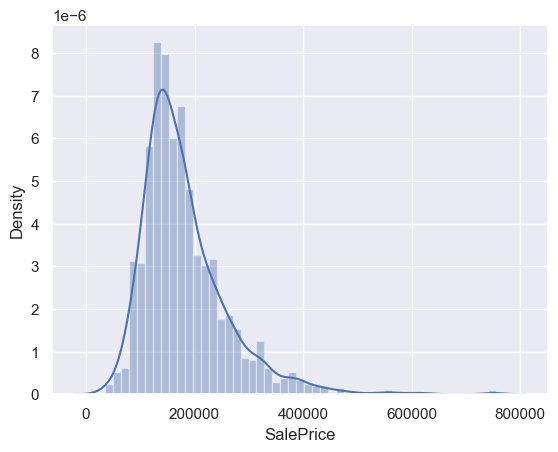

In [190]:
# How are the sales prices distributed? Normal? Skewed normal?
#histogram
var='SalePrice'
sns.distplot(data[var]);

# Feature selection

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


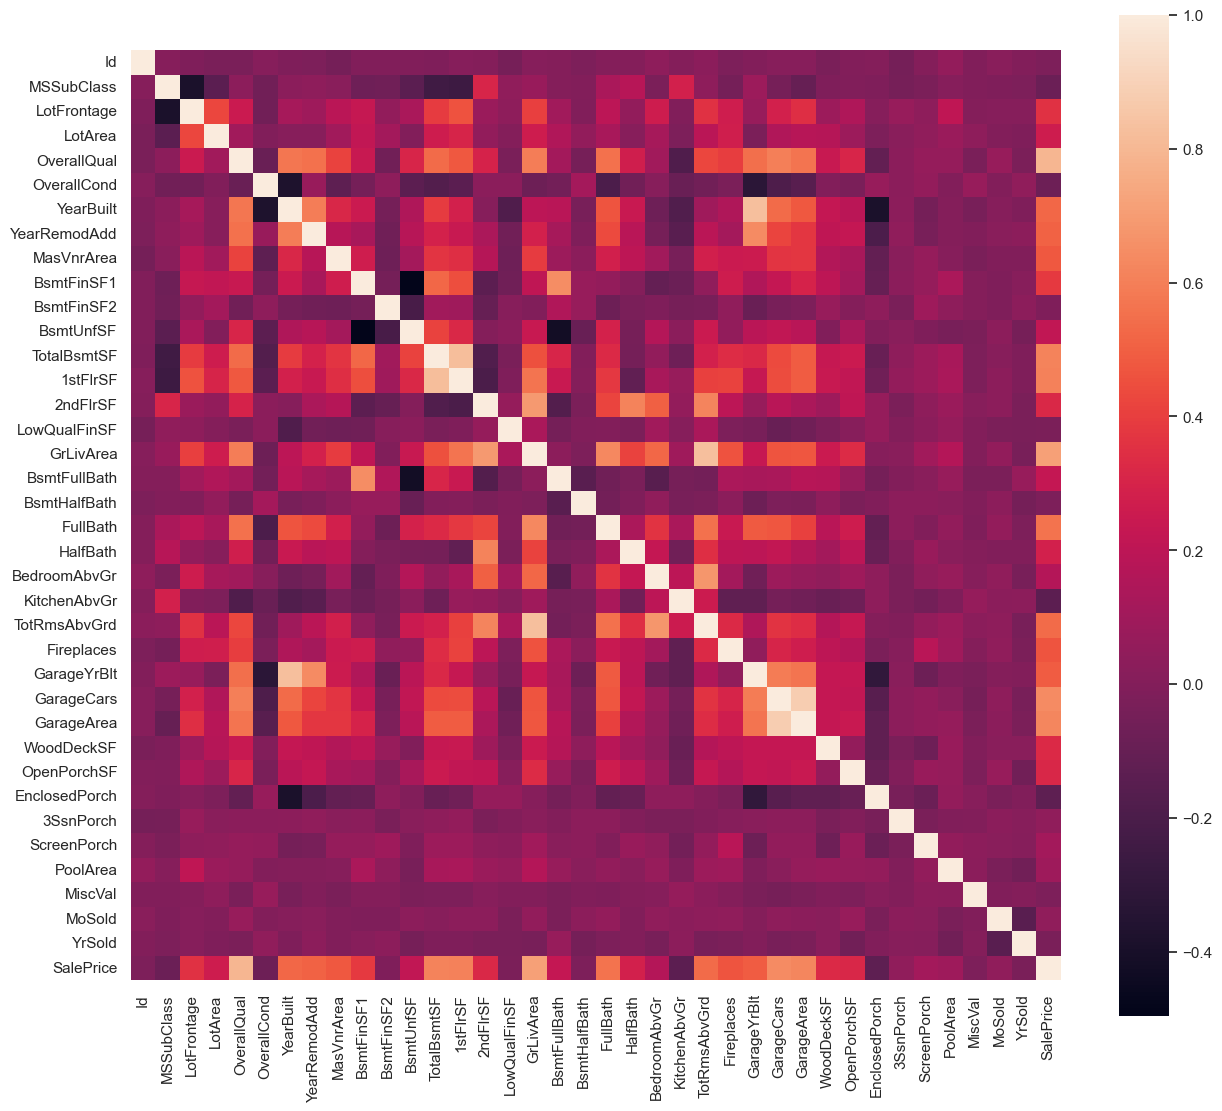

In [191]:
# correlation matrix
CORmatrix = data.corr(method='pearson')
f, ax = plt.subplots(figsize=(15,13))
sns.heatmap(CORmatrix, vmax=1, square=True)
CORmatrix.head()

In [192]:
corr_pairs = CORmatrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
## negative_pairs = sorted_pairs[sorted_pairs < 0]
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.65]
print(strong_pairs)

TotRmsAbvGrd   BedroomAbvGr     0.676620
BedroomAbvGr   TotRmsAbvGrd     0.676620
2ndFlrSF       GrLivArea        0.687501
GrLivArea      2ndFlrSF         0.687501
SalePrice      GrLivArea        0.708624
GrLivArea      SalePrice        0.708624
OverallQual    SalePrice        0.790982
SalePrice      OverallQual      0.790982
TotalBsmtSF    1stFlrSF         0.819530
1stFlrSF       TotalBsmtSF      0.819530
TotRmsAbvGrd   GrLivArea        0.825489
GrLivArea      TotRmsAbvGrd     0.825489
YearBuilt      GarageYrBlt      0.825667
GarageYrBlt    YearBuilt        0.825667
GarageArea     GarageCars       0.882475
GarageCars     GarageArea       0.882475
Id             Id               1.000000
MoSold         MoSold           1.000000
LowQualFinSF   LowQualFinSF     1.000000
2ndFlrSF       2ndFlrSF         1.000000
1stFlrSF       1stFlrSF         1.000000
TotalBsmtSF    TotalBsmtSF      1.000000
BsmtUnfSF      BsmtUnfSF        1.000000
BsmtFinSF2     BsmtFinSF2       1.000000
BsmtFinSF1     B

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')


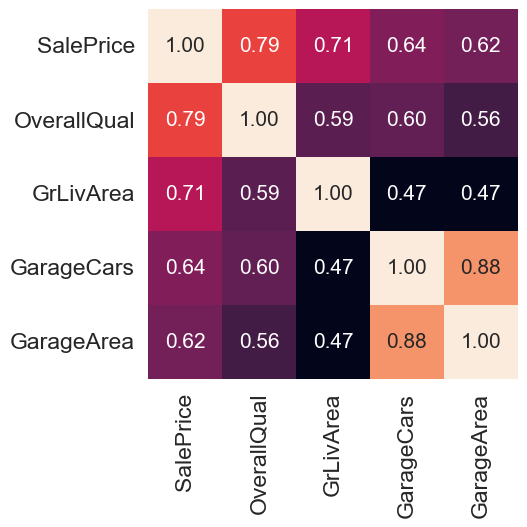

In [193]:
#Small correlation matrix
k = 5 #number of variables for heatmap
cols = CORmatrix.nlargest(k, 'SalePrice')['SalePrice'].index   # nlargest : pick the k highest correlation scores
print(cols)
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [194]:
# What happened to the rest of the features? 81 before, only 38 in the CORmatrix
#for example:
var='Electrical' #not in CORmatrix !an object 
#var='MoSold'     # in CORmatrix
print(data[var].dtype)
print(data[var])

#You can separate floats and strings (see for yourself):
object_columns_df = data.select_dtypes(include=['object'])
numerical_columns_df =data.select_dtypes(exclude=['object'])

object
0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object


In [195]:
# Replacing strings by numerical data:
var='Electrical' #not in CORmatrix
list=[]; #create an empty list

for i in range(data[var].shape[0]):
    item=data[var].values[i]
    if item not in list:
       list.append(item)
print(list)

# dupl_data=data.copy()
# newvar=var+"v2"
# dupl_data[newvar]=np.zeros(data[var].shape[0])
# for i in range(data[var].shape[0]):
#     item=data[var].values[i]
#     num=list.index(item)
#     #print(item,'replaced by: ',float(num))
#     dupl_data[newvar].values[i]=float(num)

# dupl_data[newvar].dtype
# dupl_data = dupl_data.drop([var],axis=1)
# print(dupl_data.columns)

['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan]


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


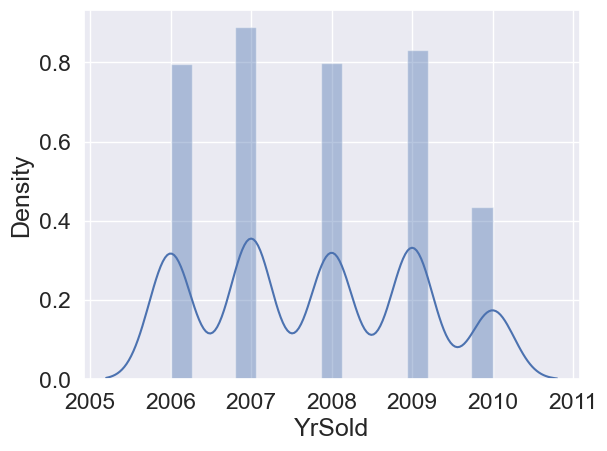

In [196]:
#Creating a copy of the train and test datasets
c_data  = data.copy()
c_test  = test.copy()
#Concatenate training and test data:
c_data['train']  = 1
c_test['train']  = 0
a_data = pd.concat([c_data, c_test], axis=0,sort=False)

var='YrSold'
sns.distplot(a_data[var]);

In [197]:
# a_data = pd.get_dummies(a_data, columns=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 
#                                                         'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
#                                                         'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
#                                                         'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
#                                                         'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
#                                                         'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
#                                                         'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
#                                                         'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
#                                                         'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
#                                                         'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
#                                                         'SaleType', 'SaleCondition'])

In [198]:
#Calculate the percentage of NAN / NaN/ None/ numpy.NaN values. Characters such as empty strings '' or 
#numpy.inf are not considered NA values (unless you set pd.options.mode.use_inf_as_na = True).

#pd.options.mode.use_inf_as_na = False

NAN = [(var, a_data[var].isna().mean()*100) for var in a_data]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NANbad = NAN[NAN.percentage > 30] # Show all features with more than 30% missing info
NANbad.sort_values("percentage", ascending=False)

# NANgood = NAN[NAN.percentage < 30] # Show all features with less than 30% missing info
# NANgood.sort_values("percentage", ascending=True)

,column_name,percentage
72,PoolQC,99.657417
74,MiscFeature,96.402878
6,Alley,93.216855
73,Fence,80.438506
80,SalePrice,49.982871
57,FireplaceQu,48.646797


In [199]:
# Selecting features by accepting all, and then kicking some out:
a_data = a_data.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)
# cat_columns = a_data.select_dtypes(include=['object']).columns
# print(cat_columns)

In [200]:
# For features that you want to keep, but have some NaN entries: You can assign the mean value to the missing 
# entries.

a_data["FireplaceQu"] = a_data["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    a_data[col] = a_data[col].fillna('None')
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood

a_data["LotFrontage"] = a_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    a_data[col] = a_data[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    a_data[col] = a_data[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    a_data[col] = a_data[col].fillna('None')
    
a_data["MasVnrType"] = a_data["MasVnrType"].fillna("None")
a_data["MasVnrArea"] = a_data["MasVnrArea"].fillna(0)
a_data['MSZoning'] = a_data['MSZoning'].fillna(a_data['MSZoning'].mode()[0])
a_data["Functional"] = a_data["Functional"].fillna("Typ")
a_data['Electrical'] = a_data['Electrical'].fillna(a_data['Electrical'].mode()[0])
a_data['KitchenQual'] = a_data['KitchenQual'].fillna(a_data['KitchenQual'].mode()[0])
a_data['Exterior1st'] = a_data['Exterior1st'].fillna(a_data['Exterior1st'].mode()[0])
a_data['Exterior2nd'] = a_data['Exterior2nd'].fillna(a_data['Exterior2nd'].mode()[0])
a_data['SaleType'] = a_data['SaleType'].fillna(a_data['SaleType'].mode()[0])
a_data['Utilities'] = a_data['Utilities'].fillna(a_data['Utilities'].mode()[0])

# Na most likely means No building class. We can replace missing values with None
a_data['MSSubClass'] = a_data['MSSubClass'].fillna("None")

#Check remaining missing values if any 
a_data_na = (a_data.isnull().sum() / len(a_data)) * 100
a_data_na = a_data_na.drop(a_data_na[a_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :a_data_na})
missing_data.head()

,Missing Ratio
SalePrice,49.982871


In [201]:
# #after kicking selected features out, change categorical features to numerical ones
from sklearn.preprocessing import OneHotEncoder


# get the list of categorical column names
cat_columns = a_data.select_dtypes(include=['object']).columns

# print(cat_columns)
# instantiate the OneHotEncoder with categorical features
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# fit and transform the categorical columns
cat_ohe = pd.DataFrame(ohe.fit_transform(a_data[cat_columns]))

# get the list of feature names from the OneHotEncoder
ohe_feature_names = ohe.get_feature_names_out(cat_columns)

# assign the feature names to the new DataFrame
cat_ohe.columns = ohe_feature_names

# drop the original categorical columns from the DataFrame
a_data = a_data.drop(cat_columns, axis=1)

# concatenate the encoded categorical DataFrame with the original DataFrame
print(a_data.columns,"\n")
print(cat_ohe.columns)
a_data = a_data.reset_index()
cat_ohe= cat_ohe.reset_index()


a_data = pd.concat((a_data, cat_ohe), axis=1).reset_index(drop=True)
print("all_data size is : {}".format(a_data.shape))
# print the new DataFrame
print(a_data)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'train'],
      dtype='object') 

Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_No

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


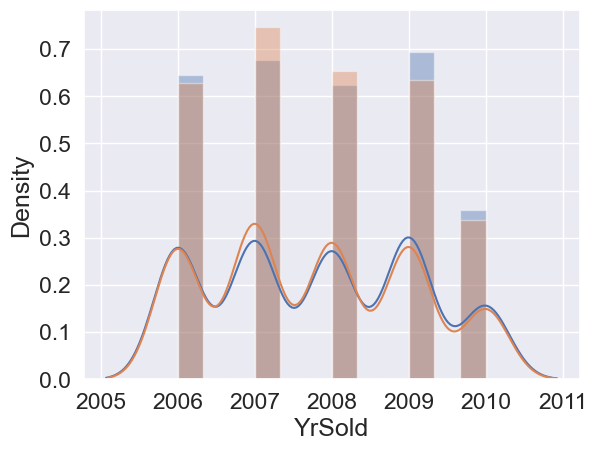

In [202]:
# Is there a 'bad' selection of training/test data?

var='YrSold'
sns.distplot(data[var]);
sns.distplot(test[var]);

# Feature Scaling and Engineering

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


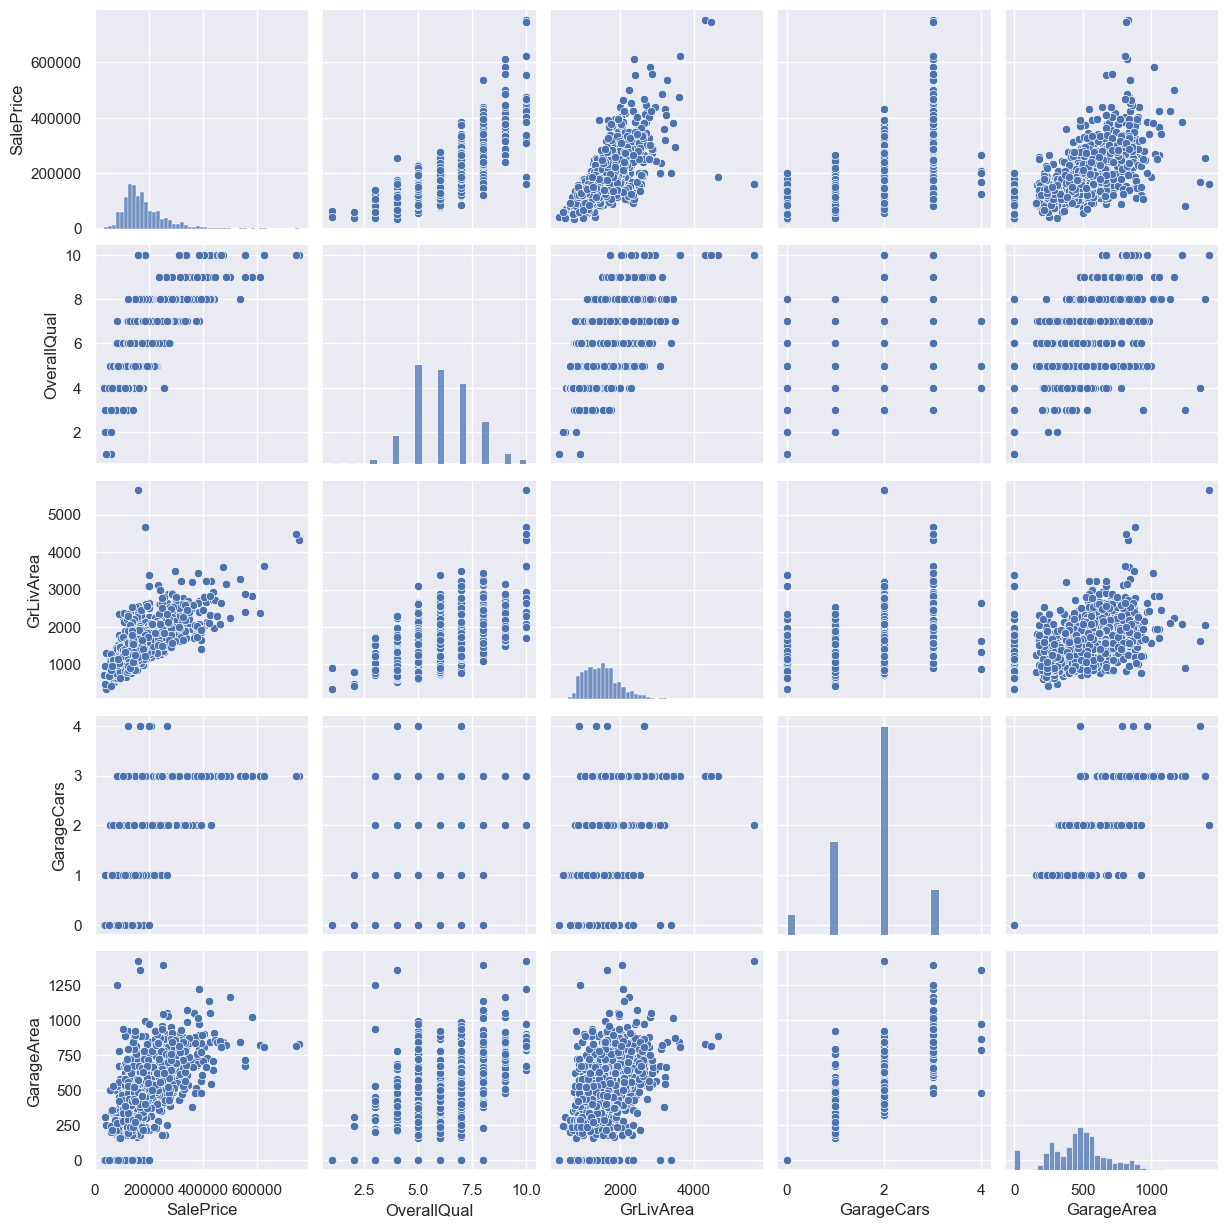

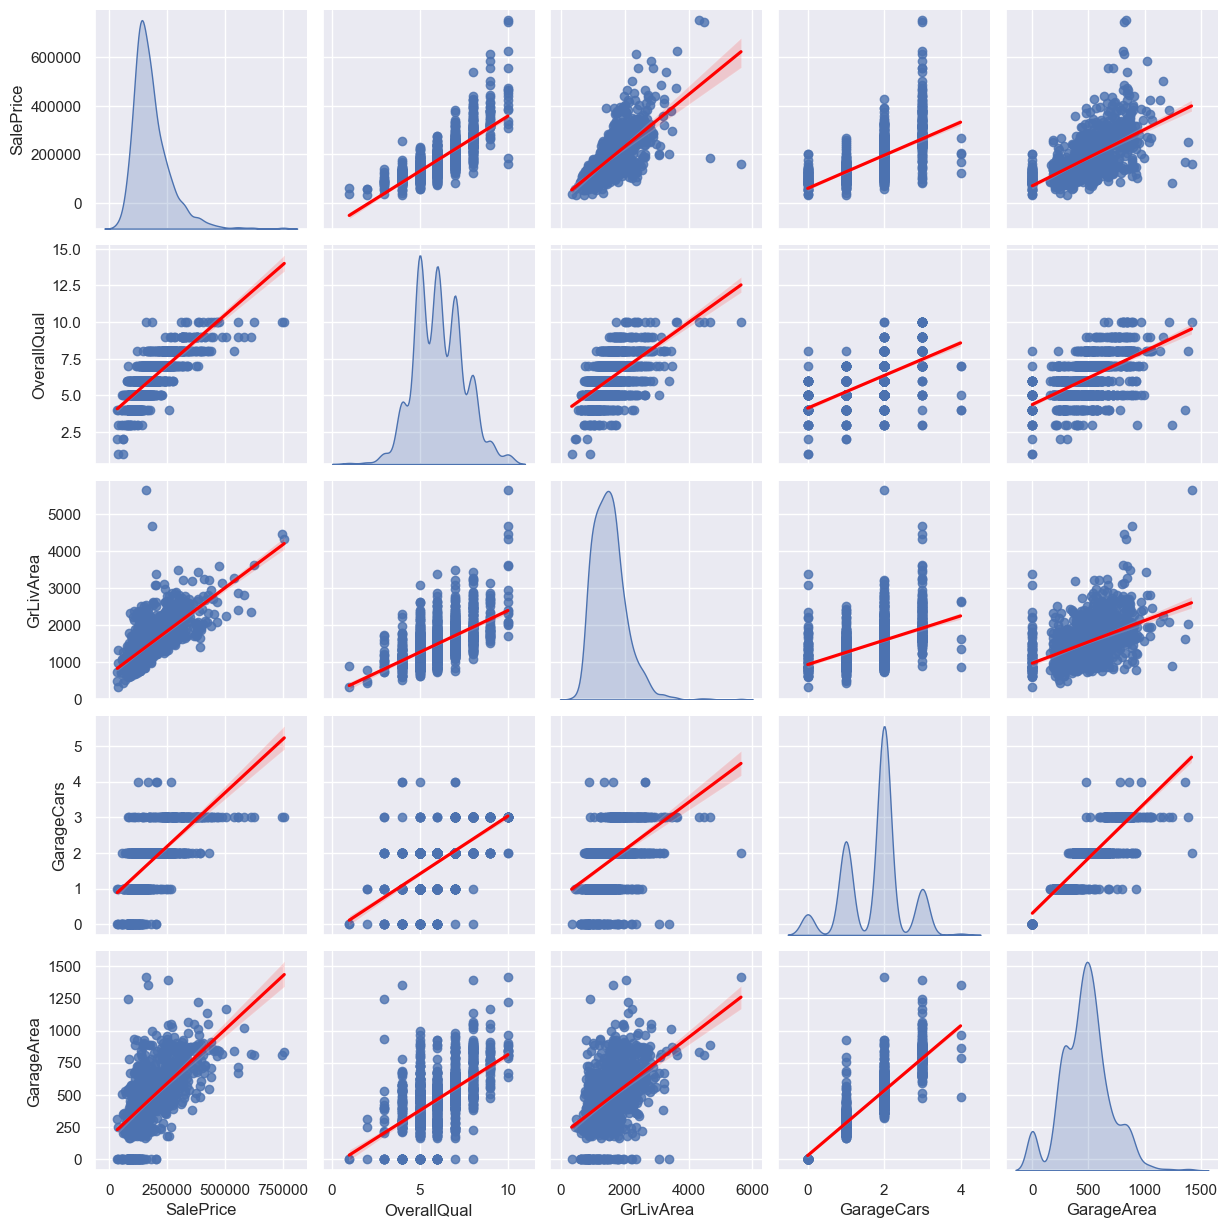

In [203]:
# Lets investigate how the sales price 'scales' with the following well correlated features
sns.set() 
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']
sns.pairplot(data[cols],size=2.5)
sns.pairplot(data[cols], kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}})
plt.show();

In [204]:
# Some ideas:
# Create new features, such as the age of the house
# ...
# # Adding total sqfootage feature 
a_data['TotalSF'] = a_data['TotalBsmtSF'] + a_data['1stFlrSF'] + a_data['2ndFlrSF']
print(a_data.shape)

a_data['Age'] = 2023-a_data['YearBuilt']
print(a_data['Age'])
print(a_data.shape)

a_data['PorchSF'] = a_data['OpenPorchSF'] + a_data ['EnclosedPorch'] + a_data ['3SsnPorch'] + a_data['ScreenPorch']


(2919, 291)
0        20
1        47
2        22
3       108
4        23
       ... 
2914     53
2915     53
2916     63
2917     31
2918     30
Name: Age, Length: 2919, dtype: int64
(2919, 292)


# Build Regression Model

In [205]:
#Import Libraries for example:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
# try different models (Lasso, Ridge, Elasticnet,) and see if they improve your prediction:

In [179]:
lr = LinearRegression()
# ntrain = a_data.shape[0]
# X_train=data[:ntrain]
# y_train=data['SalePrice']
train_data = a_data[a_data['train'] == 1].copy()
train_Y = train_data['SalePrice']
#print( train_Y)
train_X= train_data.drop(['SalePrice'],axis=1)
train_X= train_X.drop(['Id'],axis=1)
#print(train_X)

test_X = a_data[a_data['train'] == 0].copy()
test_X =test_X.drop(['SalePrice'],axis=1)
test_X =test_X.drop(['Id'],axis=1)

# print(test_X)
# Split train
# from sklearn.model_selection import train_test_split

# #'X_train' and 'y_train' is used for training the model, 'X_val' and 'y_val' is used for validating the model
# X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.2, random_state=42)

# Train model on training data

In [206]:
model = lr.fit(train_X, train_Y)

print('Intercept:', model.intercept_)
print('R-squared:', model.score(train_X, train_Y))

Intercept: 2402767723154009.0
R-squared: 0.9312915871656742


# Results: Predict Sales prices for the test dataset

In [217]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

## LASSO
# # Initialize Lasso model
#lasso = Lasso(alpha=0.1)

# # Fit the model to the training data
#lasso.fit(train_X, train_Y)
# # Predict the target variable for test data
#y_pred = lasso.predict(test_X)
## RMSE = 0.17705

## RIDGE
# # Initialize Ridge model
#ridge = Ridge(alpha=0.5)

# # Fit the model to the training data
#ridge.fit(train_X, train_Y)

# # Predict the target variable for test data
#y_pred = ridge.predict(test_X)
#RMSE = 0.17863


## ELASTICNET
# Initialize ElasticNet model
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the model to the training data
elasticnet.fit(train_X, train_Y)

# Predict the target variable for test data
y_pred = elasticnet.predict(test_X)
#RMSE = 0.14371


In [208]:
# Decision tree
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=20)
tree.fit(train_X, train_Y)
y_pred = tree.predict(test_X)
## 0.23715 (max depth 3)
##0.20915 (max depth 10)
## 0.19884 (max depth 20)x


In [209]:
# Neural Networks
from sklearn.neural_network import MLPClassifier

# Initialize the model with desired parameters
nn = MLPClassifier(hidden_layer_sizes=(100)*15, max_iter=10000, alpha=0.0001, solver='adam', 
                   activation='relu', random_state=42, tol=0.0001) ## default solver

# Train the model on the training data
nn.fit(train_X, train_Y)

# Predict on the test set
y_pred = nn.predict(test_X)

## RMSE = 0.3679 (adam, 10000 iterations, 15 layers)

In [218]:
submission = pd.DataFrame({"Id": test["Id"],"SalePrice": y_pred})
submission.to_csv('submission.csv', index=False)
import os
print(os.getcwd())


C:\Users\User\Documents


# Discussion and Conclusion

Based on the training dataset, Sales prices seem to have a skewed to the left normal distribution. This means that some high value homes are driving the mean price up. Due to this continuous distribution, we choose to model via regression, also as a mean to identify key features for variation of the price. 

With that being said, simple linear regression leaves a lot of room for improvement, with a very high RMSE. Hence, we attempt a Lasso regression. Lasso regression prefers solutions with fewer non-zero coefficients, reducing the number of features that make the solution dependent. This seemed relevant as there were a lot of features, and there was no selection based on correlation, or lack thereof. With an RMSE of 0.17705, the lasso regression performs quite decently. On the other hand, we try ridge regression, which imposes penalty on the coefficients, minimizing a penalized residual sum of squares. This produces a similar result to the lasso regression, likely due to a lack of multicollinearity in the data. 

With the ElasticNet model, we see a huge improvement on the RMSE (0.14371), also the lowest we were able to receive. This model utilizes both the non-zero weights like Lasso and the regularization with penalities like Ridge. 

Lastly, we attempted mdoeeling with decision trees and neural networks, as other methods to use for this case. For this we chose a decision tree of depth 20, and a neural entwork with 15 hidden layers. Needless to say, an optimization model would have been more appropriate here regarding the usage of decision trees and neural networks. Neural networks particularly produced quite non-optimal results, which implies a need for a different configuration. 

Given more time for this project, more experimentation is needed for neural networks and decision trees. A code that splits the current training set for testing (perhaps 85% to 15%) could help test the results better before submission into Kaggle. Additionally, this way we can iterate the parameters of decision trees and neural network, in an attempt to find a better configuration, possibly better than the elasticNet regression. 

Lastly, it might be worth exploring merger of features such as number of bathrooms, kitchens, and bedrooms, or half and full baths. Another potentially interesting input is the YearRemodAdd, which was not currently included in Age, but could play a bigger factor. Re-evaluating the features after the analysis is also an important step to come up with an improved model. 
